<a href="https://colab.research.google.com/github/roydatascientist/Facial-Expression-Recognition-using-Machine-Learning/blob/master/Facial_Expression_Recognition_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Emotions.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("File extracted!")

File extracted!


In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Building CNN Model
facial_expression_model = Sequential()
facial_expression_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
facial_expression_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
facial_expression_model.add(MaxPooling2D(pool_size=(2, 2)))
facial_expression_model.add(Dropout(0.25))

facial_expression_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
facial_expression_model.add(MaxPooling2D(pool_size=(2, 2)))
facial_expression_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
facial_expression_model.add(MaxPooling2D(pool_size=(2, 2)))
facial_expression_model.add(Dropout(0.25))

facial_expression_model.add(Flatten())
facial_expression_model.add(Dense(1024, activation='relu'))
facial_expression_model.add(Dropout(0.5))
facial_expression_model.add(Dense(7, activation='softmax'))

Epoch 1/50
448/448 [==============================] - 26s 28ms/step - loss: 1.8006 - accuracy: 0.2616 - val_loss: 1.7002 - val_accuracy: 0.3287
Epoch 2/50
448/448 [==============================] - 12s 27ms/step - loss: 1.6234 - accuracy: 0.3681 - val_loss: 1.5383 - val_accuracy: 0.4164
Epoch 3/50
448/448 [==============================] - 13s 29ms/step - loss: 1.5254 - accuracy: 0.4148 - val_loss: 1.4563 - val_accuracy: 0.4453
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4544 - accuracy: 0.4428 - val_loss: 1.3985 - val_accuracy: 0.4735
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3965 - accuracy: 0.4666 - val_loss: 1.3471 - val_accuracy: 0.4898
Epoch 6/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3459 - accuracy: 0.4888 - val_loss: 1.3028 - val_accuracy: 0.5050
Epoch 7/50
448/448 [==============================] - 13s 29ms/step - loss: 1.2975 - accuracy: 0.5091 - val_loss: 1.2722 - val_accuracy:

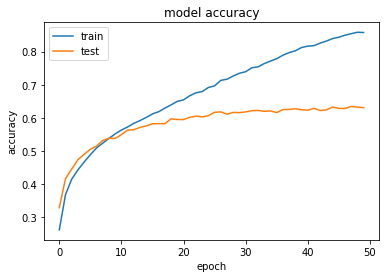

In [5]:
import matplotlib.pyplot as plt
facial_expression_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
facial_expression_model_info = facial_expression_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)
plt.plot(facial_expression_model_info.history['accuracy'])
plt.plot(facial_expression_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

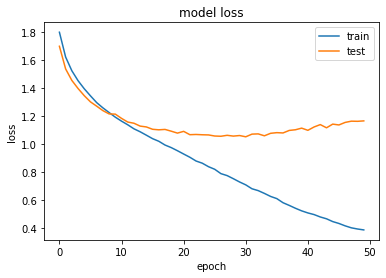

In [17]:
plt.plot(facial_expression_model_info.history['loss'])
plt.plot(facial_expression_model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [18]:
#Saving the model
facial_expression_model.save('emotions_model.h5')

In [19]:
#Loading the model
from keras.models import load_model
facial_expression_model = load_model('/content/drive/MyDrive/emotions_model.h5')

In [20]:
facial_expression_model.load_weights('/content/drive/MyDrive/emotions_model.h5')

In [21]:
facial_expression_model.evaluate( validation_generator)

113/113 [==============================] - 2s 20ms/step - loss: 1.1887 - accuracy: 0.6262


[1.1887383460998535, 0.6262189745903015]

In [22]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5,  color="navy")
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [26]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO
 
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

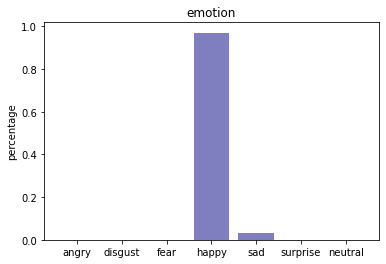

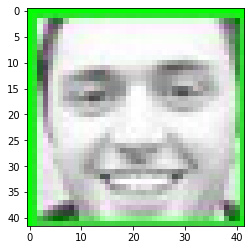

In [27]:
import cv2
            
def facecrop(image):  
    facedata = '/content/drive/MyDrive/haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)
 
    img = cv2.imread(image)
 
    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)
 
        faces = cascade.detectMultiScale(miniframe)
 
        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
 
            sub_face = img[y:y+h, x:x+w]
 
            
            cv2.imwrite('photo.jpg', sub_face)
            #print ("Writing: " + image)
 
    except Exception as e:
        print (e)
 
   
 
 
if __name__ == '__main__':
    facecrop('/content/photo.jpg')
 
#Testing a file.
 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
import numpy as np
import matplotlib.pyplot as plt
 
 
file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = facial_expression_model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
 
plt.imshow(true_image)
plt.show()